
<h1 style="text-align: center;">Youtube Text Data Analysis</h1>
<h3 style="text-align: center; color: #000066; font-family: 'Roboto', sans-serif;">Kingston Teffy Roy Deivapathinathan</h3>



In [230]:
from IPython.display import Image, display
from IPython.display import HTML
image_url = "https://cdn.dribbble.com/users/1923171/screenshots/5676763/chien.gif"

#display(Image(url=image_url, width=400, height=400))
#display(HTML(f'<div style="text-align: center;"><img src="{image_url}" width="400" height="400"></div>'))
display(HTML(f'''
    <div style="display: flex; justify-content: center;">
        <img src="{image_url}" width="400" height="400">
    </div>
'''))

## The main goal of this project is to analyse the textual data of Youtube(The popular video Sharing Platform) and to find the insights that can be addressed and shown for the future prospects

### The Data Collected across multiple platforms are mainly in two formats for this project
### - CSV Format
### - JSON Format


In [234]:
# All the necessary Packages used for this Analysis
# And other important packages are used here as per the requirement

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
#loading the data with Pandas Read_csv method
comments = pd.read_csv("UScomments.csv",sep=',', on_bad_lines='skip')

In [237]:
#the first three sample roes, i.e .head(3)
comments.head(3)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0


In [238]:
#.isnull method is used to find the missing values and it is shows in a boolean format
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [82]:
#we get the overall sum using the sum() method
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [83]:
#droping all the missing values

In [84]:
comments.dropna(inplace=True)

In [85]:
#no missing value after the missing values are dropped from the Dataframe
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [240]:
new_url1 = 'https://miro.medium.com/v2/resize:fit:1280/1*TxNDsw1op7sxikKd6Sk08w.gif'

display(HTML(f'''
    <div style="display: flex; justify-content: center;">
        <img src="{new_url1}" width="400" height="400">
    </div>
'''))





### TextBlob is a Python library used for processing textual data, providing easy-to-use methods for common natural language processing (NLP) tasks.

In [86]:
!pip install textblob

In [87]:
from textblob import TextBlob

In [88]:
comments.head(2)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0


In [89]:
# using .sentiment for getting the sentiment of the text
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [90]:
# using .polarity for getting the polarity of the text
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [91]:
comments.shape

(691375, 4)

#### We pass all the comments inside a For loop to get the Polarity of each comment of the entire Dataframe

In [92]:
polarity = []
for comment in comments["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [93]:
comments['Polarity'] = polarity

In [94]:
comments.head()

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [241]:
new_url3 = 'https://upload.wikimedia.org/wikipedia/commons/7/76/Inaugural_Address_word_clouds.gif'
display(HTML(f'''
    <div style="display: flex; justify-content: center;">
        <img src="{new_url3}" width="400" height="400">
    </div>
'''))








<h2 style="text-align: center;">WordCloud</h2>


### A word cloud is a visual representation of text data where frequently occurring words are displayed in larger, more prominent fonts, and it is used to quickly identify key themes or topics in a body of text.

In [95]:
!pip install wordcloud

In [245]:
#Stop words are common words (like "and," "the," or "is") that are often filtered out in text processing because they carry less meaningful information and are frequently used.
from wordcloud import WordCloud, STOPWORDS

In [97]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [98]:
#Data type of the column "comment_text"
type(comments["comment_text"])

pandas.core.series.Series

In [99]:
# WordCloud(stopwords=set(STOPWORDS)).generate()

In [246]:
new_url4 =' https://cdn.prod.website-files.com/5ab25784c7fcbff004fa8dca/5ec3b0b58737c8c8d53e5fe1_ST0-1-360p-cc78b25d-faec-47ee-a379-51dd9aea5e37.gif'
display(HTML(f'''
    <div style="display: flex; justify-content: center;">
        <img src="{new_url4}" width="400" height="400">
    </div>
'''))

In [100]:
#To get all the Positive Comments where Polarity is +1
filter1 = comments['Polarity']==1

In [274]:
filter1.shape

(691375,)

In [101]:
comments_positive = comments[filter1]

In [278]:
#to find the value_count of Positive Comments
comments_positive['Polarity'].value_counts()

1.0    19390
Name: Polarity, dtype: int64

In [102]:
comments_positive

,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [103]:
#To get all the Comments where Polarity is -1 for Negative
filter2 = comments['Polarity']==-1

In [279]:
#to find the value_count of Positive Comments
comments_negative['Polarity'].value_counts()

-1.0    3508
Name: Polarity, dtype: int64

In [104]:
comments_negative = comments[filter2]

In [105]:
comments_negative

,video_id,comment_text,likes,replies,Polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [106]:
#joining all Positive Comments with a space in between them " "
total_positive_comments = ' '.join(comments_positive['comment_text'])

In [107]:
total_positive_comments

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [108]:
total_negative_comments = ' '.join(comments_negative['comment_text'])

In [109]:
total_negative_comments

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [110]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

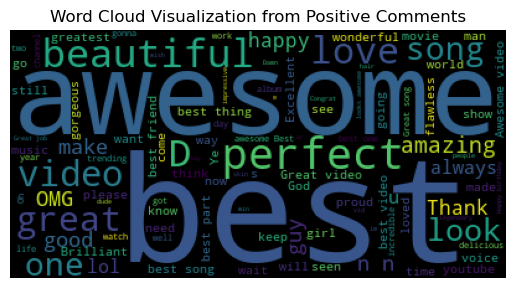

In [250]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud Visualization from Positive Comments", fontsize=12)
plt.show()

In [112]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

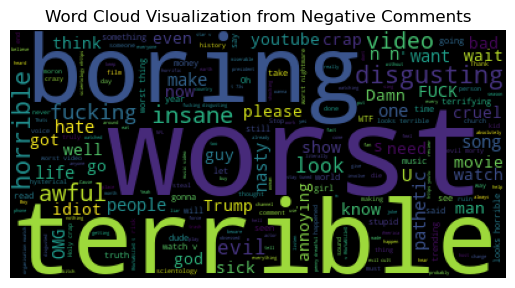

In [251]:
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Word Cloud Visualization from Negative Comments", fontsize=12)
plt.show()

### EMOJI Package:
### The emoji package in Python simplifies integrating and processing emojis in text, enhancing communication, data analysis, and user engagement across various applications.

In [114]:
!pip install emoji

In [115]:
import emoji

In [116]:
emoji.__version__

'2.12.1'


<h2 style="text-align: center;">Emoji Analysis</h2>


In [117]:
#Example for a Comment with an Emoji
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [118]:
comment = 'trending 😉'

In [119]:
#example to how to extract an emoji
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [120]:
emoji_list

['😉']

In [121]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
    

In [122]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [123]:
from collections import Counter df

#### The Most Commony used Emoji and their Count

In [124]:
Counter(all_emojis_list).most_common(15)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381)]

In [125]:
Counter(all_emojis_list).most_common(15)[0][1]

36987

In [126]:
Counter(all_emojis_list).most_common(15)[0][0]

'😂'

In [252]:
# The top 15 Emojis Used

In [127]:
all_emojis = [Counter(all_emojis_list).most_common(15)[i][0] for i in range(15)]

In [128]:
all_emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕', '♥', '😊', '🏻', '💜', '😬']

In [129]:
freq = [Counter(all_emojis_list).most_common(15)[i][1] for i in range(15)]

In [130]:
freq

[36987,
 33453,
 31119,
 8694,
 8398,
 5719,
 5545,
 5476,
 5359,
 5147,
 4909,
 3596,
 3438,
 3429,
 3381]

### Why Plotly Graphs?
### Plotly is a powerful library for creating interactive and visually appealing plots and graphs in Pythonm

In [131]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [253]:
import plotly.graph_objects as go
trace = go.Bar(x=all_emojis, y=freq, marker=dict(color='skyblue'))
fig = go.Figure(data=[trace])
fig.update_layout(
    title='Emoji and Frequency Count',
    xaxis_title='Emojis',
    yaxis_title='Frequency'
)
fig.show()

### Collect Entire Data from YouTube

In [133]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [134]:
import os

In [135]:
files = os.listdir('/Users/teffy/Desktop/GMP/Learning/DATA Projects/Youtube Project/additional_data')

### The Files Avaialbe for the Analysis:
### - CSV Files
### - JSON Files

In [136]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [137]:
files_csv = [file for file in files if '.csv' in file]

In [138]:
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

### Creating a Full DataFrame which is a colletion of all the extracted Datam

In [139]:
full_df = pd.DataFrame()
path = r'/Users/teffy/Desktop/GMP/Learning/DATA Projects/Youtube Project/additional_data'


for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding="iso-8859-1", error_bad_lines=False)
    print(current_df.head())  # Print the first few rows to verify

    full_df = pd.concat([full_df, current_df], ignore_index=True)


      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                           

In [140]:
full_df.shape

(375942, 16)

In [141]:
print(files_csv)

['MXvideos.csv', 'INvideos.csv', 'DEvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'CAvideos.csv', 'RUvideos.csv', 'FRvideos.csv', 'USvideos.csv', 'GBvideos.csv']


In [142]:
import os
print(os.listdir(path))

['IN_category_id.json', 'MXvideos.csv', 'RU_category_id.json', 'JP_category_id.json', 'FR_category_id.json', 'INvideos.csv', 'GB_category_id.json', 'DEvideos.csv', 'JPvideos.csv', 'KR_category_id.json', 'KRvideos.csv', 'CAvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'FRvideos.csv', 'CA_category_id.json', 'US_category_id.json', 'DE_category_id.json', 'USvideos.csv', 'GBvideos.csv']


In [143]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

## Removing Duplicate Rows from the whole data Frame

In [144]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [145]:
## now we drop the duplicates
full_df = full_df.drop_duplicates()

In [146]:
full_df.shape

(339525, 16)

In [147]:
#to save the new data in to various data foramts

In [148]:
full_df.to_csv(r'/Users/teffy/Desktop/GMP/Learning/DATA Projects/Youtube Project/youtube_sample.csv', index=False)

In [149]:
full_df.to_json(r'/Users/teffy/Desktop/GMP/Learning/DATA Projects/Youtube Project/youtube_sample.json')

In [150]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...


### Adding Features for the easy use of the Future Analysis

In [152]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

### JSON Format:
### JSON is a lightweight, human-readable format used for data interchange, configuration files, data storage, and APIs due to its simplicity and ease of integration across different systems and programming languages.

In [153]:
json_df = pd.read_json(r'/Users/teffy/Desktop/GMP/Learning/DATA Projects/Youtube Project/additional_data/US_category_id.json')

In [155]:
json_df.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [157]:
json_df["items"].head()

0    {'kind': 'youtube#videoCategory', 'etag': '"m2...
1    {'kind': 'youtube#videoCategory', 'etag': '"m2...
2    {'kind': 'youtube#videoCategory', 'etag': '"m2...
3    {'kind': 'youtube#videoCategory', 'etag': '"m2...
4    {'kind': 'youtube#videoCategory', 'etag': '"m2...
Name: items, dtype: object

In [158]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

### The two Important Parameters from the JSON format are extracted here
### Channel ID from the Snippet Dictionarym
### Our Target is to get Channel ID and Title from the JSON file(from Dictionary)

In [162]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item["snippet"]["title"]

In [163]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

### Adding a New Feature to the Dataframe "category_id"

In [165]:
full_df["Category_name"] = full_df["category_id"].map(cat_dict)

In [166]:
 full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


### Analysing Which Category has the most number of Likes!

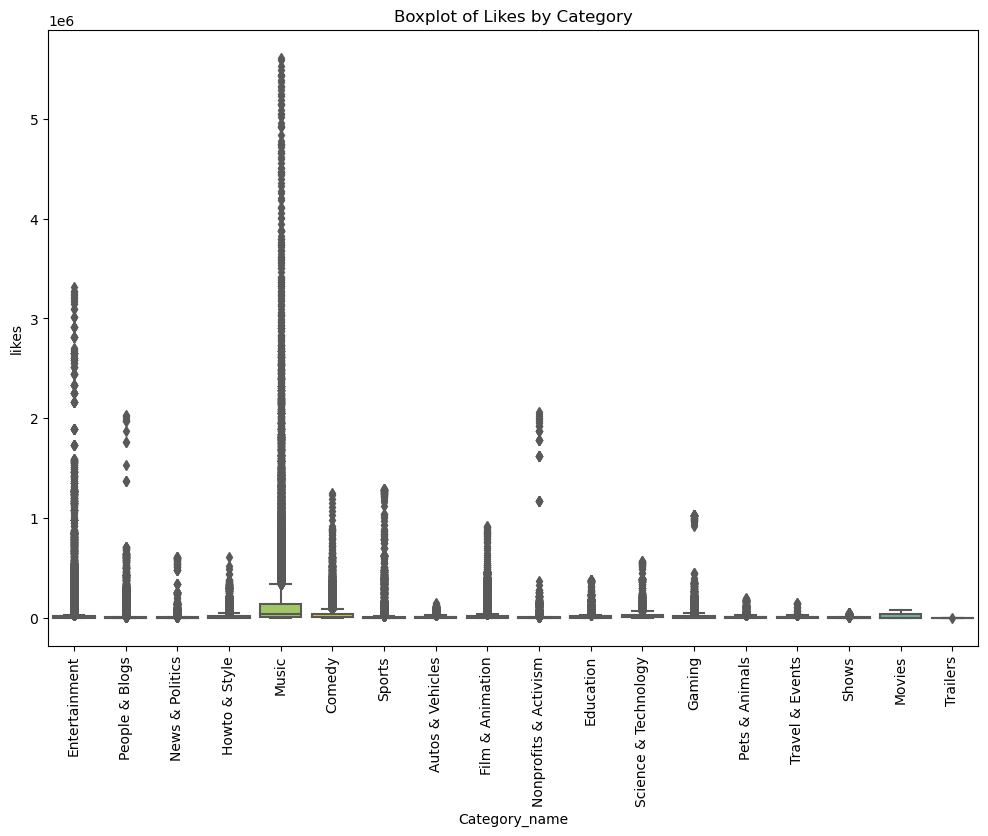

In [258]:
plt.figure(figsize=(12,8))

sns.boxplot(x="Category_name", y= 'likes',data=full_df,palette='Set2')
plt.xticks(rotation = 'vertical')
plt.title('Boxplot of Likes by Category')

plt.show()

### Adding three addtional features to the existing dataframe:
### - Likes_rate
### - Dislikes_rate
### - Comment_Count_rate




In [175]:
full_df["Likes_rate"] = full_df["likes"]/full_df["views"]*100
full_df["Dislikes_rate"] = full_df["dislikes"]/full_df["views"]*100
full_df["Comment_Count_rate"] = full_df["comment_count"]/full_df["views"]*100

In [176]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category_name,Likes_rate,Dislikes_rate,Comment_Count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704


In [179]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Category_name', 'Likes_rate',
       'Dislikes_rate', 'Comment_Count_rate'],
      dtype='object')

In [183]:
for i in sorted(full_df.columns):
    print('-->', i)

--> Category_name
--> Comment_Count_rate
--> Dislikes_rate
--> Likes_rate
--> category_id
--> channel_title
--> comment_count
--> comments_disabled
--> description
--> dislikes
--> likes
--> publish_time
--> ratings_disabled
--> tags
--> thumbnail_link
--> title
--> trending_date
--> video_error_or_removed
--> video_id
--> views


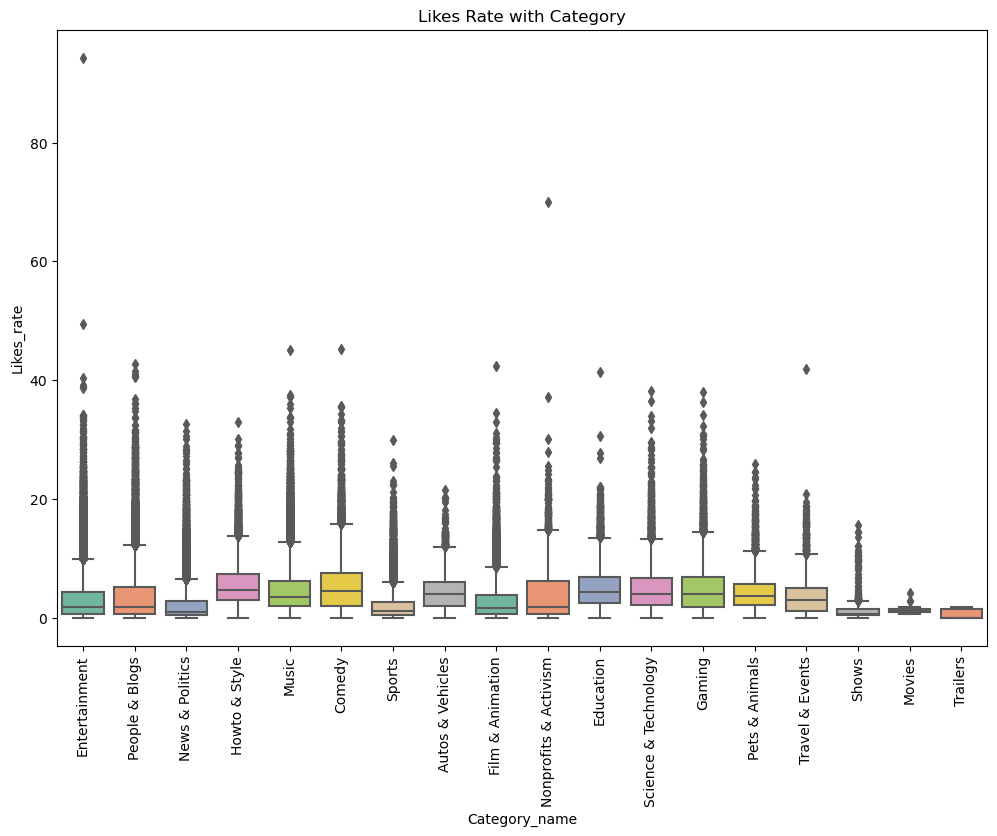

In [259]:
plt.figure(figsize=(12,8))

sns.boxplot(x="Category_name", y= 'Likes_rate',data=full_df,palette='Set2')
plt.xticks(rotation = 'vertical')
plt.title('Likes Rate with Category')

plt.show()


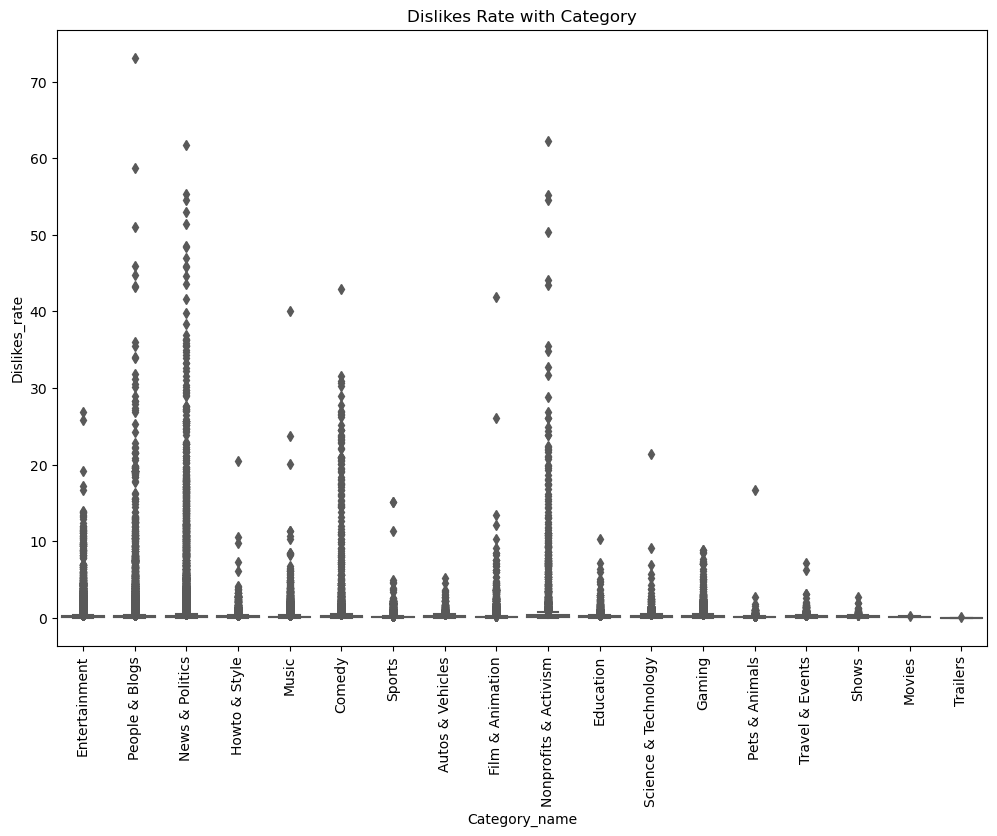

In [260]:
plt.figure(figsize=(12,8))

sns.boxplot(x="Category_name", y= 'Dislikes_rate',data=full_df,palette='Set2')
plt.xticks(rotation = 'vertical')
plt.title('Dislikes Rate with Category')

plt.show()


### Correlation measures the strength and direction of the linear relationship between two or more variables. In the context of the variables 'likes', 'views', and 'dislikes', correlation can provide insights into how these variables are related to each other. Here is a Heatmap that explains the Correlation.

<AxesSubplot:>

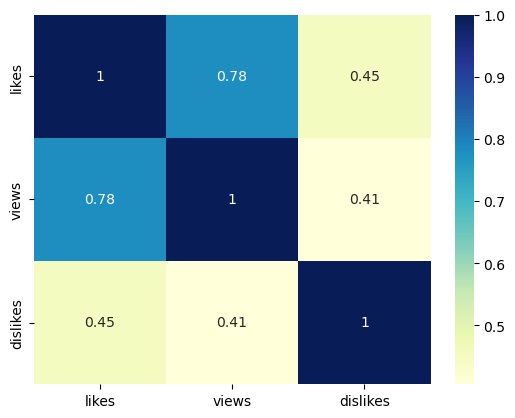

In [189]:
sns.heatmap(full_df[['likes','views','dislikes']].corr(), annot=True, cmap="YlGnBu")

### The Most Trending Videos on Youtube:

In [190]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category_name,Likes_rate,Dislikes_rate,Comment_Count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704


In [194]:
full_df["channel_title"].value_counts()


The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: channel_title, Length: 37824, dtype: int64

In [199]:
cdf = full_df.groupby(["channel_title"]).size().sort_values(ascending=False).reset_index()

In [202]:
cdf = cdf.rename(columns={0:'total_videos'})

In [203]:
cdf.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528


In [263]:
import plotly.express as px

<h3 style="text-align: center; color: #000066; font-family: 'Roboto', sans-serif;">Top 20 Channels by Total Videos</h3>

In [266]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos',color='channel_title', color_discrete_sequence=px.colors.qualitative.Plotly)


## Analysing the Punctuation in the Title of the video has any relation with the view:

In [207]:
full_df["title"]

0                            CapÃ­tulo 12 | MasterChef 2017
1         ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2                  LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA
3          Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017
4                  DOG HACKS | MUSAS LESSLIE LOS POLINESIOS
                                ...                        
375937    Enrique Iglesias - MOVE TO MIAMI (Official Vid...
375938    Jacob Sartorius - Up With It (Official Music V...
375939                   Anne-Marie - 2002 [Official Video]
375940    Eleni Foureira - Fuego - Cyprus - LIVE - First...
375941    KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...
Name: title, Length: 339525, dtype: object

In [208]:
full_df["title"][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [209]:
import string

In [210]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [268]:
#List Comprehension for the first title of the Dataframe

In [211]:
[char for char in full_df['title'][0] if char in string.punctuation]

['|']

In [212]:
[char for char in full_df['title'][1] if char in string.punctuation]

['-', '/', '/']

In [213]:
len([char for char in full_df['title'][1] if char in string.punctuation])

3

In [269]:
# creating a function for the punct count of the title for the entire Dataframe

In [270]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [216]:
full_df['title'].apply(punc_count)

0         1
1         3
2         1
3         1
4         1
         ..
375937    4
375938    3
375939    4
375940    6
375941    5
Name: title, Length: 339525, dtype: int64

In [217]:
full_df['punc_count'] = full_df['title'].apply(punc_count)


In [218]:
full_df['punc_count'].head()

0    1
1    3
2    1
3    1
4    1
Name: punc_count, dtype: int64

In [219]:
## whether all the punct reflects on the views, likes and other important factors?

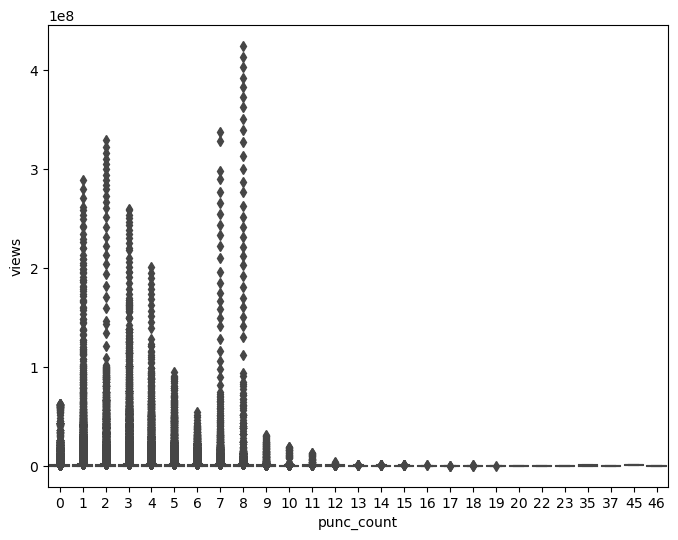

In [222]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='punc_count', y='views', data=full_df)  # Pass the actual DataFrame, not a string
plt.show()

In [272]:
url5 = 'https://i.pinimg.com/originals/30/3e/f1/303ef12fdda83daaff43f8460d27c053.gif'
display(HTML(f'''
    <div style="display: flex; justify-content: center;">
        <img src="{url5}" width="400" height="400">
    </div>
'''))

<h1 style="text-align: center;">
  <span style="color: #FF5733;">Insights</span> 
  <span style="color: #33FF57;">from</span> 
  <span style="color: #3399FF;">YouTube</span> 
  <span style="color: #F3C300;">Text Data</span> 
  <span style="color: #3399FF;">Analysis</span> 

  <span sty>

### By Calculating the Polarity which explains the sentiment from Comments of the videos
### - Polarity Abtained from the Positive Comments are, 19390
### - Polarity Abtained from the negative Comments are, 3508
### - Likes Rates are High for Entertainement Channels
### - The category Music has the most number of Likes when compared to other Categories

### The Category with Most Number of Dislikes are
### - People & Blogs
### - News & Politics
### - Nonprofits & Activism 

### And from the Punctution of the videos:
### - 1,2,3,4,7 and 8 Punctuations in the title have more number of Views

## Other Crucial Informtion can be shared by explaining the Data Visualization PLots from the Analysis